In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

### read data & information

In [166]:
df=pd.read_csv('/Users/taliyas/Downloads/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [94]:
df.shape

(4981, 11)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [96]:
# Check missing value
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### clean data
   * map columns to numeric
   * add more rows of 1

In [167]:
#Encoding
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural':0})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


In [168]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print('x shape: ',x.shape,'\ny shape: ' , y.shape)

x shape:  (4981, 10) 
y shape:  (4981,)


In [169]:
#count number of ones and zeros
from collections import Counter
Counter(y)

Counter({1: 248, 0: 4733})

In [170]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)
Counter(y_data)

Counter({1: 4733, 0: 4733})

### normalization

In [172]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_data=scale.fit_transform(x_data)
x_data

array([[-1.24072674,  0.53168424, -0.51244219, ...,  2.01383901,
         1.23916292, -1.41507791],
       [-1.24072674,  1.11962943, -0.51244219, ..., -0.22201033,
         0.54919062, -0.42655414],
       [ 0.94853871, -0.28239372, -0.51244219, ...,  0.96739523,
         0.86893388,  0.56196963],
       ...,
       [-0.91536524,  1.11290801, -0.51244219, ..., -0.27208631,
        -1.01540292, -0.27964296],
       [-1.24072674,  0.55200517,  2.44310359, ...,  2.7791066 ,
         0.34988713,  0.51660579],
       [ 0.94853871,  1.02917633, -0.51244219, ..., -1.064153  ,
        -0.59005888, -0.01438194]])

### Train & Test & Validation Split

In [194]:
X_train, X_test, y_train, y_test  = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val \
     = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
y_train = y_train.reshape((y_train.shape[0],1))
y_val = y_val.reshape((y_val.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))
print("X_train shape: ",X_train.shape)
print("X_val shape: ",X_val.shape)
print("y_test: ",y_test.shape)

X_train shape:  (5679, 10)
X_val shape:  (1893, 10)
y_test:  (1894, 1)


### initilazie tesors for LOGISTIC REGRESSION

In [195]:
features = X_train.shape[1]
eps = 1e-12
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))

In [213]:
pred = tf.nn.sigmoid(tf.matmul(x,W) + b)
loss1 = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=pred)
loss= tf.reduce_mean(loss1)
update = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [214]:
def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))

In [235]:
epoches = 300
batch_size = 300
errors = []
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(epoches):
    for start, end in zip(range(0, len(X_train), batch_size),range(batch_size, len(X_train), batch_size)):
	    sess.run(update, feed_dict = {x: X_train[start:end], y_: y_train[start:end]})
    cost = sess.run(tf.nn.l2_loss(pred - y_val),feed_dict = {x:X_val})
    errors.append(cost)

    if i%100 == 0:
      print("epoch %d, cost = %g" % (i, cost))

epoch 0, cost = 232.928
epoch 100, cost = 162.698
epoch 200, cost = 161.69


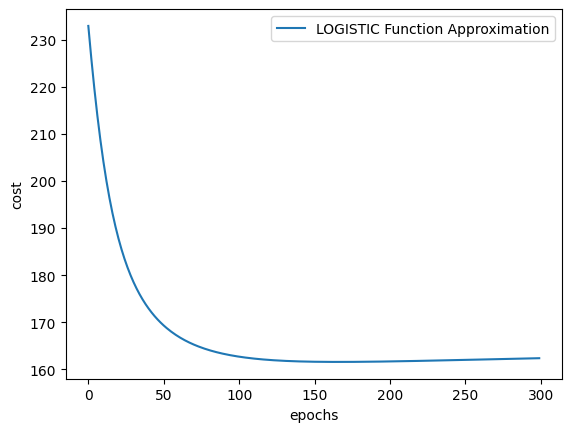

In [236]:
plt.plot(errors,label='LOGISTIC Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()

In [222]:
# calc y_pred and classify label according to threshold
def predict_logreg(X_data, Y_data):
    Y_pred = []
    answer = []
    for j in range(Y_data.shape[0]):
        p=logistic_fun(np.matmul(X_data[j], sess.run(W)) + sess.run(b))
        answer.append(p)
        if p > 0.5:
            Y_pred.append(1)
        else:
            Y_pred.append(0)
    return np.array(Y_pred), np.array(answer)

test accuracy: 0.7618796198521647 
f1_score:  0.7484662576687116 
recall:  0.7168803418803419 
precision:  0.7829638273045507 
confution matrix:  [[772 186]
 [265 671]]


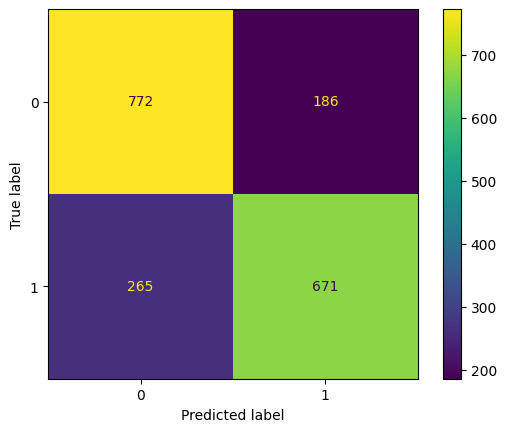

In [237]:
# test results
pred_test, ans = predict_logreg(X_test, y_test)
print("test accuracy:",accuracy_score(y_test, pred_test),
      "\nf1_score: ", f1_score(y_test, pred_test),
      "\nrecall: ", recall_score(y_test, pred_test),
      "\nprecision: ", precision_score(y_test, pred_test),
    "\nconfution matrix: ", confusion_matrix(y_test,pred_test))

cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

### initilazie tesors for MLP - one hidden layer

In [224]:
layer_1_neurons = 10
X = tf.placeholder(tf.float32, [None, features], name = "X")
Y = tf.placeholder(tf.float32, [None, 1], name = "Y")

#first layer
#Number of neurons = 10
w_h = tf.Variable(
   tf.random_uniform([features, layer_1_neurons],minval = -1, maxval = 1, dtype = tf.float32))
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], dtype = tf.float32))
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

#output layer
#Number of neurons = 10
w_o = tf.Variable(
   tf.random_uniform([layer_1_neurons, 1], minval = -1, maxval = 1, dtype = tf.float32))
b_o = tf.Variable(tf.zeros([1, 1], dtype = tf.float32))

#building the model
model = tf.matmul(h, w_o) + b_o

#minimize the cost function (model - Y)
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y))


In [225]:
#Starting the Learning phase
sess = tf.Session()
sess.run(tf.initialize_all_variables())

epoches = 800
batch_size = 300
errors = []
for i in range(epoches):
   for start, end in zip(range(0, len(X_train), batch_size),\
      range(batch_size, len(X_train), batch_size)):
      sess.run(train_op, feed_dict = {X: X_train[start:end], Y: y_train[start:end]})
   cost = sess.run(tf.nn.l2_loss(model - y_val),feed_dict = {X:X_val})
   errors.append(cost)

   if i%100 == 0:
      print("epoch %d, cost = %g" % (i, cost))

epoch 0, cost = 1506.77
epoch 100, cost = 144.076
epoch 200, cost = 134.121
epoch 300, cost = 118.354
epoch 400, cost = 107.278
epoch 500, cost = 103.383
epoch 600, cost = 101.99
epoch 700, cost = 101.336


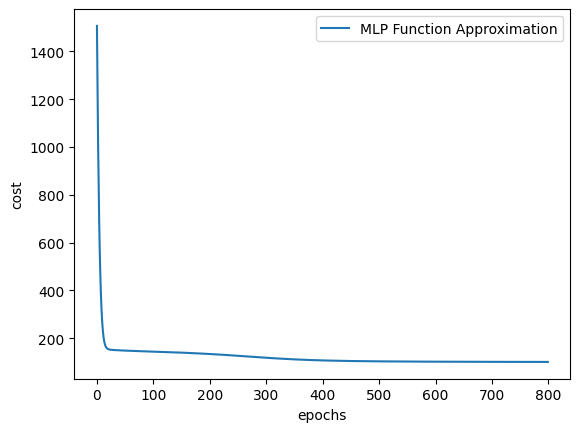

In [226]:
plt.plot(errors,label='MLP Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()

In [227]:
prediction=model.eval(session=sess, feed_dict={X:X_test})
def predict_mlp(y_predict):
    Y_pred = []
    for j in range(y_predict.shape[0]):
        if y_predict[j] > 0.5:
            Y_pred.append(1)
        else:
            Y_pred.append(0)
    return np.array(Y_pred)

test accuracy: 0.8606124604012672 
f1_score:  0.8598726114649682 
recall:  0.8653846153846154 
precision:  0.8544303797468354 
confusion matrix:  [[820 138]
 [126 810]]


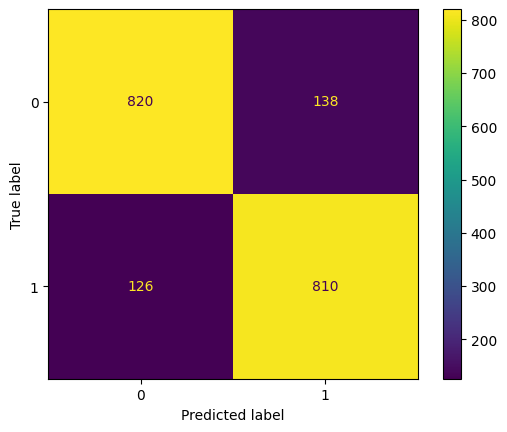

In [239]:
y_pred = predict_mlp(prediction)
print("test accuracy:",accuracy_score(y_test, y_pred),
      "\nf1_score: ", f1_score(y_test, y_pred),
      "\nrecall: ", recall_score(y_test, y_pred),
      "\nprecision: ", precision_score(y_test, y_pred),
    "\nconfusion matrix: ", confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### add hidden layer

In [229]:
layer_1_neurons = 10
layer_2_neurons = 10
layer_3_neurons = 10
X = tf.placeholder(tf.float32, [None, features], name = "X")
Y = tf.placeholder(tf.float32, [None, 1], name = "Y")

#first layer
#Number of neurons = 10
w_h1 = tf.Variable(
   tf.random_uniform([features, layer_1_neurons],minval = -1, maxval = 1, dtype = tf.float32))
b_h1 = tf.Variable(tf.zeros([1, layer_1_neurons], dtype = tf.float32))
h1 = tf.nn.sigmoid(tf.matmul(X, w_h1) + b_h1)

#second layer
#Number of neurons = 10
w_h2 = tf.Variable(
   tf.random_uniform([layer_1_neurons, layer_2_neurons],minval = -1, maxval = 1, dtype = tf.float32))
b_h2 = tf.Variable(tf.zeros([1, layer_2_neurons], dtype = tf.float32))
h2= tf.nn.sigmoid(tf.matmul(h1, w_h2) + b_h2)

#third layer
#Number of neurons = 5
w_h3 = tf.Variable(
   tf.random_uniform([layer_2_neurons, layer_3_neurons],minval = -1, maxval = 1, dtype = tf.float32))
b_h3 = tf.Variable(tf.zeros([1, layer_3_neurons], dtype = tf.float32))
h3= tf.nn.sigmoid(tf.matmul(h2, w_h3) + b_h3)

#output layer
#Number of neurons = 10
w_o = tf.Variable(
   tf.random_uniform([layer_3_neurons, 1], minval = -1, maxval = 1, dtype = tf.float32))
b_o = tf.Variable(tf.zeros([1, 1], dtype = tf.float32))

#building the model
model = tf.matmul(h3, w_o) + b_o

#minimize the cost function (model - Y)
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y))


In [230]:
#Starting the Learning phase
sess = tf.Session()
sess.run(tf.initialize_all_variables())

epoches = 800
batch_size = 300
errors = []
for i in range(epoches):
   for start, end in zip(range(0, len(X_train), batch_size),\
      range(batch_size, len(X_train), batch_size)):
      sess.run(train_op, feed_dict = {X: X_train[start:end], Y: y_train[start:end]})
   cost = sess.run(tf.nn.l2_loss(model - y_val),feed_dict = {X:X_val})
   errors.append(cost)

   if i%100 == 0:
      print("epoch %d, cost = %g" % (i, cost))

epoch 0, cost = 2751.95
epoch 100, cost = 143.35
epoch 200, cost = 134.441
epoch 300, cost = 122.551
epoch 400, cost = 116.963
epoch 500, cost = 112.994
epoch 600, cost = 107.081
epoch 700, cost = 100.93


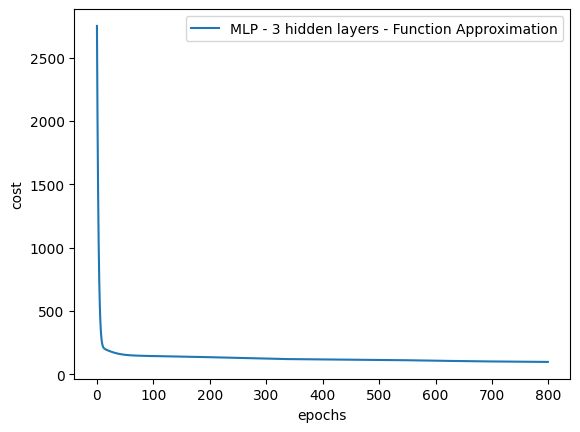

In [232]:
plt.plot(errors,label='MLP - 3 hidden layers - Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()

test accuracy: 0.8606124604012672 
f1_score:  0.8598726114649682 
recall:  0.8653846153846154 
precision:  0.8544303797468354 
confusion matrix:  [[820 138]
 [126 810]]


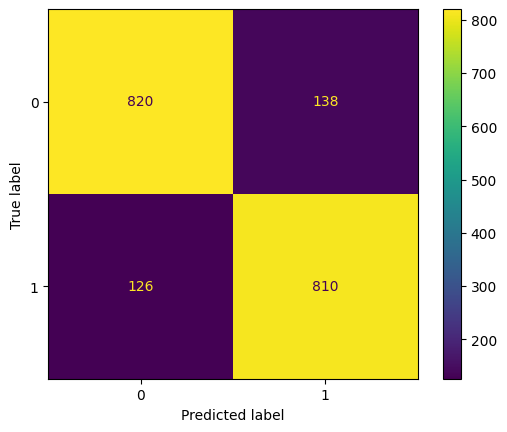

In [238]:
y_pred = predict_mlp(prediction)
print("test accuracy:",accuracy_score(y_test, y_pred),
      "\nf1_score: ", f1_score(y_test, y_pred),
      "\nrecall: ", recall_score(y_test, y_pred),
      "\nprecision: ", precision_score(y_test, y_pred),
    "\nconfusion matrix: ", confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [234]:
x_data.shape

(9466, 10)